# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]
# Fetch current ETH price
# YOUR CODE HERE!

eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
# YOUR CODE HERE!

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $76305.07
The current value of your 5.3 ETH is $22077.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
investment_df = alpaca.get_barset(tickers, timeframe, start = today, limit=5).df

investment_df.head()

# Preview DataFrame
# YOUR CODE HERE!

AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2021-08-16 00:00:00-04:00  116.14  116.270  116.03  116.03  3406963  444.54   
2021-08-17 00:00:00-04:00  115.98  116.090  115.93  115.95  4493522  444.24   
2021-08-18 00:00:00-04:00  115.94  116.030  115.80  115.96  3840678  442.96   
2021-08-19 00:00:00-04:00  116.12  116.155  116.02  116.14  4314380  436.27   
2021-08-20 00:00:00-04:00  116.18  116.210  116.08  116.15  2672679  440.23   

                                                              
                              high     low   close    volume  
time                                                          
2021-08-16 00:00:00-04:00  447.110  442.87  447.02  52706914  
2021-08-17 00:00:00-04:00  444.960  440.85  444.06  84161406  
2021-08-18 00:00:00-04:00  444.625  438.92  439.21  70093163  
2021-08-19 00:00:00-04:00  441.140  436.12  439.84  84838725  
2021-08-20 00:00:00-04:00  443.710  439.71  443.33  63120064

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(investment_df['AGG']['close'][0])
spy_close_price = float(investment_df['SPY']['close'][0])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.03
Current SPY closing price: $447.02


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22351.00
The current value of your 200 AGG shares is $23206.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

df_savings = pd.DataFrame([my_btc_value + my_eth_value, my_spy_value + my_agg_value], columns = ['amount'], index = ['crypto', 'shares'])

# Consolidate financial assets data
# YOUR CODE HERE!

# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

,amount
crypto,98382.32411
shares,45557.00000


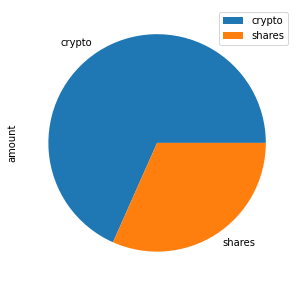

In [12]:
# Plot savings pie chart
plot_pie = df_savings.plot.pie(y='amount', figsize=(5,5))



In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

my_spy_agg = my_agg_value + my_spy_value

if  my_spy_agg > emergency_fund:
    print("Congratulations, you have enough money for emergencies!")
elif df_savings == emergency_fund:
    print("You reached your financial goal!")
else:
    print(f"You need {emergency_fund-my_spy_agg} to get financially stable")
    
# Calculate total amount of savings
# YOUR CODE HERE!


# Validate saving health
# YOUR CODE HERE!

Congratulations, you have enough money for emergencies!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

ticker = ["SPY","AGG"]

df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [26]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [27]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_year.portfolio_data.head()


AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [28]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003773,1.001494,0.999345,0.997458,0.991394,1.000656,0.997277,0.991542,0.999392,0.998632,...,1.001364,1.004544,1.004828,0.991369,1.002230,0.999465,1.011425,0.995564,0.998910,1.001302
2,0.991514,0.995951,1.007245,1.001932,0.978341,1.007542,1.008604,0.986502,1.014968,1.002355,...,1.000387,1.011853,1.006996,0.981622,0.999336,0.999493,1.006028,0.998052,0.989767,0.988683
3,1.001034,1.010572,1.015172,0.997921,0.983923,1.017485,1.009219,0.986453,1.016878,1.014235,...,1.003799,1.016646,1.011397,0.982557,1.009038,0.996414,1.015817,0.995591,0.991814,0.989818
4,0.988176,1.023695,1.011965,0.998307,0.980800,1.012087,1.008166,0.972979,1.010344,1.005358,...,1.012533,1.014219,1.016759,0.981207,1.002939,1.000516,1.005740,0.990884,0.994336,0.989370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.128459,1.703709,1.704805,0.957313,1.307843,1.679666,2.408760,1.966709,1.643811,1.814905,...,1.177947,2.621391,1.962807,1.741846,1.584652,1.656365,2.188671,1.686865,1.440750,1.540570
1257,1.123338,1.725607,1.698308,0.960014,1.301615,1.671247,2.387051,1.955512,1.642988,1.787330,...,1.181430,2.591472,1.972946,1.741360,1.585571,1.667019,2.193618,1.689701,1.449564,1.540330
1258,1.121327,1.688682,1.709008,0.964474,1.293518,1.672043,2.361547,1.954390,1.655872,1.788561,...,1.179785,2.580001,1.966236,1.741655,1.572800,1.681204,2.222218,1.690015,1.441494,1.538212
1259,1.115119,1.683344,1.690207,0.977385,1.301500,1.672085,2.370300,1.936234,1.664472,1.770143,...,1.168322,2.608797,1.958325,1.732707,1.584281,1.690814,2.200745,1.682993,1.444048,1.529689


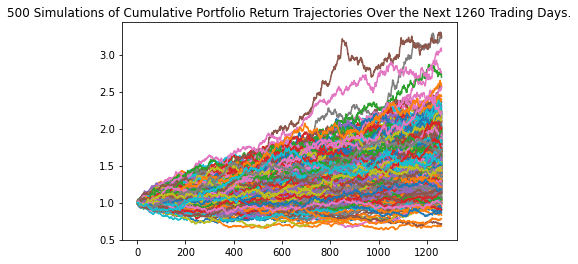

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_thirty_year.plot_simulation()
line_plot.get_figure().savefig("MC_thirty_sim_plot.png", bbox_inches="tight")

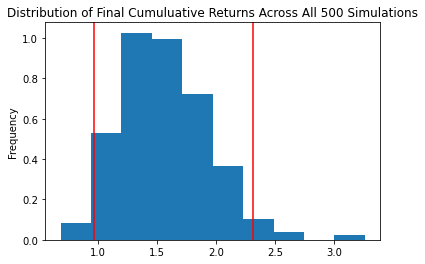

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE

print(tbl)

count           500.000000
mean              1.569971
std               0.378823
min               0.685395
25%               1.287819
50%               1.546521
75%               1.811090
max               3.257138
95% CI Lower      0.968005
95% CI Upper      2.313062
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19360.1 and $46261.25


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $29040.15 and $69391.87


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE! *Use this...

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")